# IMPORTING DATA

Country dataset include following information: 
 - name - common name in english
 - topLevelDomain - country code top-level domain 
 - alpha2Code - code ISO 3166-1 alpha-2 
 - alpha3Code - code ISO 3166-1 alpha-3 
 - callingCodes - list of all suffixes calling codes assigned to this country
 - capital - capital city(ies)
 - altSpellings - alternative spellings for country name
 - region
 - subregion
 - population
 - latlng - latitude and longitude 
 - demonym - name of residents living in the country
 - area - land area in km² 
 - gini - measures the inequality among values of a frequency distribution (for example, levels of income). A Gini coefficient of zero expresses perfect equality, where all values are the same (for example, where everyone has the same income). A Gini coefficient of one (or 100%) expresses maximal inequality among values (e.g., for a large number of people, where only one person has all the income or consumption, and all others have none, the Gini coefficient will be very nearly one).
 (Hệ số Gini thường được sử dụng để biểu thị mức độ bất bình đẳng trong phân phối thu nhập giữa các tầng lớp cư dân. Số 0 tượng trưng cho sự bình đẳng thu nhập tuyệt đối (mọi người đều có cùng một mức thu nhập), số 1 tượng trưng cho sự bất bình đẳng thu nhập tuyệt đối (một người có toàn bộ thu nhập, trong khi tất cả mọi người khác không có thu nhập).

Hệ số Gini cũng được dùng để biểu thị mức độ chênh lệch về giàu nghèo. Khi sử dụng hệ số Gini trong trường hợp này, điều kiện yêu cầu phải thỏa mãn không tồn tại cá nhân nào có thu nhập ròng âm.)
 
- timezones
- borders - land borders 
- nativeName - country native names
- numericCode
- currencies - list of all currencies
 	- key: ISO 4217 currency code
 	- value: currency object
 		- key: `name` name of the currency
 		- key: `symbol` symbol of the currency
- list of official languages (`languages`)
	- key: three-letter ISO 639-3 language code
 	- value: name of the language in english 
- flag - Emoji flag
- regionalBlocs - type of intergovernmental agreement, often part of a regional intergovernmental organization, where barriers to trade (tariffs and others) are reduced or eliminated among the participating states.
- cioc - code International Olympic Committee 

In [984]:
import requests
import pandas as pd
import json
from PIL import Image
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [985]:
def api_import(n):
    response = requests.get(n)
    status=response.status_code
    print("Import status:",status)
    d=response.json()
    df=pd.json_normalize(d)
    print("Data shape:",df.shape[0])
    print('Data column:', df.columns)
    return df          

In [986]:
df = api_import('https://restcountries.eu/rest/v2/all')

Import status: 200
Data shape: 250
Data column: Index(['name', 'topLevelDomain', 'alpha2Code', 'alpha3Code', 'callingCodes',
       'capital', 'altSpellings', 'region', 'subregion', 'population',
       'latlng', 'demonym', 'area', 'gini', 'timezones', 'borders',
       'nativeName', 'numericCode', 'currencies', 'languages', 'flag',
       'regionalBlocs', 'cioc', 'translations.de', 'translations.es',
       'translations.fr', 'translations.ja', 'translations.it',
       'translations.br', 'translations.pt', 'translations.nl',
       'translations.hr', 'translations.fa'],
      dtype='object')


In [987]:
df.dtypes

name                object
topLevelDomain      object
alpha2Code          object
alpha3Code          object
callingCodes        object
capital             object
altSpellings        object
region              object
subregion           object
population           int64
latlng              object
demonym             object
area               float64
gini               float64
timezones           object
borders             object
nativeName          object
numericCode         object
currencies          object
languages           object
flag                object
regionalBlocs       object
cioc                object
translations.de     object
translations.es     object
translations.fr     object
translations.ja     object
translations.it     object
translations.br     object
translations.pt     object
translations.nl     object
translations.hr     object
translations.fa     object
dtype: object

# Cleaning data

## Un-nest all columns

In [988]:
# unnest_lst = ['currencies', 'languages']

# def unnest(unnest_lst,df):
#     for j in range(len(unnest_lst)):
#         lst=[]
#         col = df[unnest_lst[j]]
#         for i in range(0,len(col)):
#             tab=pd.Series(col[i])
#             tab=pd.json_normalize(tab)
#             name=tab['name'].tolist()
#             lst.append(name)
#         df[unnest_lst[j]]=lst
#     return df


# df = unnest(unnest_lst,df)
# df.head(3)

### currencies column

chỗ này tui chỉnh lại trên code của ông chút xíu cho nó chỉ hiện lên currency code vs remoce hết khoảng trống để nó hiện value lên cho clean.

In [989]:
df['currencies']

0      [{'code': 'AFN', 'name': 'Afghan afghani', 'sy...
1       [{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]
2      [{'code': 'ALL', 'name': 'Albanian lek', 'symb...
3      [{'code': 'DZD', 'name': 'Algerian dinar', 'sy...
4      [{'code': 'USD', 'name': 'United State Dollar'...
                             ...                        
245    [{'code': 'XPF', 'name': 'CFP franc', 'symbol'...
246    [{'code': 'MAD', 'name': 'Moroccan dirham', 's...
247    [{'code': 'YER', 'name': 'Yemeni rial', 'symbo...
248    [{'code': 'ZMW', 'name': 'Zambian kwacha', 'sy...
249    [{'code': 'BWP', 'name': 'Botswana pula', 'sym...
Name: currencies, Length: 250, dtype: object

In [990]:
def currencies(col):
    curr=[]
    for i in range(0,len(col)):
        tab=pd.Series(col[i])
        tab=pd.json_normalize(tab)
        name=tab['code'].to_string()
        name=name.replace('0','').replace('\n1',',').replace(' ','').replace(',(none)','').replace('None,','').replace('none,','').replace("(none),",'')
        curr.append(name)
    return curr

c=df['currencies']
d=currencies(c)
df['currencies']=d

df.head()

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,translations.de,translations.es,translations.fr,translations.ja,translations.it,translations.br,translations.pt,translations.nl,translations.hr,translations.fa
0,Afghanistan,[.af],AF,AFG,[93],Kabul,"[AF, Afġānistān]",Asia,Southern Asia,27657145,...,Afghanistan,Afganistán,Afghanistan,アフガニスタン,Afghanistan,Afeganistão,Afeganistão,Afghanistan,Afganistan,افغانستان
1,Åland Islands,[.ax],AX,ALA,[358],Mariehamn,"[AX, Aaland, Aland, Ahvenanmaa]",Europe,Northern Europe,28875,...,Åland,Alandia,Åland,オーランド諸島,Isole Aland,Ilhas de Aland,Ilhas de Aland,Ålandeilanden,Ålandski otoci,جزایر الند
2,Albania,[.al],AL,ALB,[355],Tirana,"[AL, Shqipëri, Shqipëria, Shqipnia]",Europe,Southern Europe,2886026,...,Albanien,Albania,Albanie,アルバニア,Albania,Albânia,Albânia,Albanië,Albanija,آلبانی
3,Algeria,[.dz],DZ,DZA,[213],Algiers,"[DZ, Dzayer, Algérie]",Africa,Northern Africa,40400000,...,Algerien,Argelia,Algérie,アルジェリア,Algeria,Argélia,Argélia,Algerije,Alžir,الجزایر
4,American Samoa,[.as],AS,ASM,[1684],Pago Pago,"[AS, Amerika Sāmoa, Amelika Sāmoa, Sāmoa Amelika]",Oceania,Polynesia,57100,...,Amerikanisch-Samoa,Samoa Americana,Samoa américaines,アメリカ領サモア,Samoa Americane,Samoa Americana,Samoa Americana,Amerikaans Samoa,Američka Samoa,ساموآی آمریکا


### languages column

chỗ này tui phát hiện ra nếu mình unlist thì các giá trị nó sẽ ko count/tính statistics cho nó đc nữa do mình cho nó thành 1 chuỗi str nên tạm thời tui để # dòng unlist của ông. Sau này nếu mình làm tiếp tới nó thì mình sẽ mở lại. The same cho bên cột borders.

In [991]:
#Function to extract and unlist languages column
def languages(col):
    lang=[]
    for i in range(0,len(col)):
        tab=pd.Series(col[i])
        tab=pd.json_normalize(tab)
        name=tab['name'].tolist()
#         name=','.join(name)
        lang.append(name)
    return lang

a=df['languages']
b=languages(a)
df['languages']=b

df.head()

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,translations.de,translations.es,translations.fr,translations.ja,translations.it,translations.br,translations.pt,translations.nl,translations.hr,translations.fa
0,Afghanistan,[.af],AF,AFG,[93],Kabul,"[AF, Afġānistān]",Asia,Southern Asia,27657145,...,Afghanistan,Afganistán,Afghanistan,アフガニスタン,Afghanistan,Afeganistão,Afeganistão,Afghanistan,Afganistan,افغانستان
1,Åland Islands,[.ax],AX,ALA,[358],Mariehamn,"[AX, Aaland, Aland, Ahvenanmaa]",Europe,Northern Europe,28875,...,Åland,Alandia,Åland,オーランド諸島,Isole Aland,Ilhas de Aland,Ilhas de Aland,Ålandeilanden,Ålandski otoci,جزایر الند
2,Albania,[.al],AL,ALB,[355],Tirana,"[AL, Shqipëri, Shqipëria, Shqipnia]",Europe,Southern Europe,2886026,...,Albanien,Albania,Albanie,アルバニア,Albania,Albânia,Albânia,Albanië,Albanija,آلبانی
3,Algeria,[.dz],DZ,DZA,[213],Algiers,"[DZ, Dzayer, Algérie]",Africa,Northern Africa,40400000,...,Algerien,Argelia,Algérie,アルジェリア,Algeria,Argélia,Argélia,Algerije,Alžir,الجزایر
4,American Samoa,[.as],AS,ASM,[1684],Pago Pago,"[AS, Amerika Sāmoa, Amelika Sāmoa, Sāmoa Amelika]",Oceania,Polynesia,57100,...,Amerikanisch-Samoa,Samoa Americana,Samoa américaines,アメリカ領サモア,Samoa Americane,Samoa Americana,Samoa Americana,Amerikaans Samoa,Američka Samoa,ساموآی آمریکا


In [992]:
df['languages']

0                [Pashto, Uzbek, Turkmen]
1                               [Swedish]
2                              [Albanian]
3                                [Arabic]
4                       [English, Samoan]
                      ...                
245                              [French]
246                             [Spanish]
247                              [Arabic]
248                             [English]
249    [English, Shona, Northern Ndebele]
Name: languages, Length: 250, dtype: object

### regionalBlocs column

In [993]:
def blocs(col):
    bloc=[]   
    for i in range(0,len(col)):
        if len(col[i]) > 0:
            tab=pd.Series(col[i])
            tab=pd.json_normalize(tab)
            name=tab['name'].tolist()
            name=''.join(name)
            bloc.append(name)
        else:
            bloc.append('None')
    return bloc


r=df['regionalBlocs']
t=blocs(r)
df['regionalBlocs']=t

df['regionalBlocs'].head()

0    South Asian Association for Regional Cooperation
1                                      European Union
2               Central European Free Trade Agreement
3                            African UnionArab League
4                                                None
Name: regionalBlocs, dtype: object

### borders column

In [994]:
# #Unlist columns function
# def unlist(col):
#     ls=[]
#     for i in range(0,250):
#         a=col[i]
#         a=','.join(a)
#         ls.append(a)
#     return ls

# #Unlist borders column
# lis=df['borders']
# unlis=unlist(lis)
# df['borders']=unlis

# df.head()

## Drop unnecessary columns

In [995]:
df.rename(columns={'name':'country','alpha3Code':'alphaCode'},inplace=True)
df.drop(['topLevelDomain','alpha2Code','altSpellings','callingCodes','numericCode','translations.de', 'translations.es',
       'translations.fr', 'translations.ja', 'translations.it',
       'translations.br', 'translations.pt', 'translations.nl',
       'translations.hr', 'translations.fa'],axis=1,inplace=True)

## EDA - Missing data and fill in

In [996]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        250 non-null    object 
 1   alphaCode      250 non-null    object 
 2   capital        250 non-null    object 
 3   region         250 non-null    object 
 4   subregion      250 non-null    object 
 5   population     250 non-null    int64  
 6   latlng         250 non-null    object 
 7   demonym        250 non-null    object 
 8   area           240 non-null    float64
 9   gini           153 non-null    float64
 10  timezones      250 non-null    object 
 11  borders        250 non-null    object 
 12  nativeName     250 non-null    object 
 13  currencies     250 non-null    object 
 14  languages      250 non-null    object 
 15  flag           250 non-null    object 
 16  regionalBlocs  250 non-null    object 
 17  cioc           247 non-null    object 
dtypes: float64

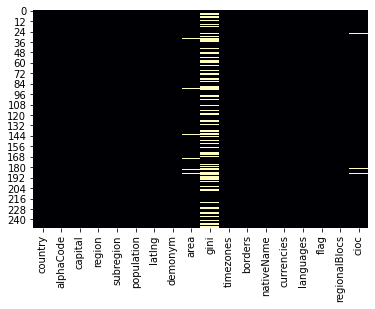

In [997]:
sns.heatmap(df.isnull(),cbar=False, cmap='magma'
#             , yticklabels=False
           )
plt.show()

In [998]:
#There are some columns with empty string values which are not shown as NaN
#Fill all those with Unknown string
def fill_empty(col):
    new=[]
    for i in col:
        if i == '':
            new.append('Unknown')
        else:
            new.append(i)
    return new

df['subregion']=fill_empty(df['subregion'])
df['region']=fill_empty(df['region'])
df['demonym']=fill_empty(df['demonym'])
df['cioc']=fill_empty(df['cioc'])
df['capital']=fill_empty(df['capital'])

### Categorial variables

Basic statistics and frequency distributed for each categorial variables as below:
- region
- subregion
- demonym
- currencies
- languages
- regionalBlocs

#### region and subregion column

In [999]:
df['region'].value_counts()

Africa      60
Americas    57
Europe      53
Asia        50
Oceania     27
Unknown      2
Polar        1
Name: region, dtype: int64

In [1000]:
df[df['region'] == 'Unknown']

,country,alphaCode,capital,region,subregion,population,latlng,demonym,area,gini,timezones,borders,nativeName,currencies,languages,flag,regionalBlocs,cioc
30,Bouvet Island,BVT,Unknown,Unknown,Unknown,0,"[-54.43333333, 3.4]",Unknown,49.0,NaN,[UTC+01:00],[],Bouvetøya,NOK,"[Norwegian, Norwegian Bokmål, Norwegian Nynorsk]",https://restcountries.eu/data/bvt.svg,None,Unknown
98,Heard Island and McDonald Islands,HMD,Unknown,Unknown,Unknown,0,"[-53.1, 72.51666666]",Heard and McDonald Islander,412.0,NaN,[UTC+05:00],[],Heard Island and McDonald Islands,AUD,[English],https://restcountries.eu/data/hmd.svg,None,Unknown


Fill region and subregion for row 30 (Bouvet Island) with same information as in row 167 (Norway) as they are in similar area.

In [1001]:
df.loc[30,'region'] = df.loc[167,'region']
df.loc[30,'subregion'] = df.loc[167,'subregion']

Fill region and subregion for row 98 (Heard Island and McDonald Islands) with same information as in row 13 (Australia) as they are in Australian territory.

In [1002]:
df.loc[98,'region'] = df.loc[13,'region']
df.loc[98,'subregion'] = df.loc[13,'subregion']

In [1003]:
df['region'].value_counts()

Africa      60
Americas    57
Europe      54
Asia        50
Oceania     28
Polar        1
Name: region, dtype: int64

In [1004]:
fig = go.Figure(data=[go.Histogram(histfunc="count", x=df['region'])])
fig.show()

#### capital column

In [1005]:
df[df['capital'] == 'Unknown']

,country,alphaCode,capital,region,subregion,population,latlng,demonym,area,gini,timezones,borders,nativeName,currencies,languages,flag,regionalBlocs,cioc
8,Antarctica,ATA,Unknown,Polar,Unknown,1000,"[-74.65, 4.48]",Unknown,14000000.0,NaN,"[UTC-03:00, UTC+03:00, UTC+05:00, UTC+06:00, U...",[],Antarctica,"AUD,GBP","[English, Russian]",https://restcountries.eu/data/ata.svg,None,Unknown
30,Bouvet Island,BVT,Unknown,Europe,Northern Europe,0,"[-54.43333333, 3.4]",Unknown,49.0,NaN,[UTC+01:00],[],Bouvetøya,NOK,"[Norwegian, Norwegian Bokmål, Norwegian Nynorsk]",https://restcountries.eu/data/bvt.svg,None,Unknown
33,United States Minor Outlying Islands,UMI,Unknown,Americas,Northern America,300,[],American,NaN,NaN,"[UTC-11:00, UTC-10:00, UTC+12:00]",[],United States Minor Outlying Islands,USD,[English],https://restcountries.eu/data/umi.svg,None,Unknown
98,Heard Island and McDonald Islands,HMD,Unknown,Oceania,Australia and New Zealand,0,"[-53.1, 72.51666666]",Heard and McDonald Islander,412.0,NaN,[UTC+05:00],[],Heard Island and McDonald Islands,AUD,[English],https://restcountries.eu/data/hmd.svg,None,Unknown
131,Macao,MAC,Unknown,Asia,Eastern Asia,649100,"[22.16666666, 113.55]",Chinese,30.0,NaN,[UTC+08:00],[CHN],澳門,MOP,"[Chinese, Portuguese]",https://restcountries.eu/data/mac.svg,None,Unknown


In [1006]:
## not necessary to fill in info here

#### demonym column

In [1007]:
df[df['demonym'] == 'Unknown']

,country,alphaCode,capital,region,subregion,population,latlng,demonym,area,gini,timezones,borders,nativeName,currencies,languages,flag,regionalBlocs,cioc
8,Antarctica,ATA,Unknown,Polar,Unknown,1000,"[-74.65, 4.48]",Unknown,14000000.00,NaN,"[UTC-03:00, UTC+03:00, UTC+05:00, UTC+06:00, U...",[],Antarctica,"AUD,GBP","[English, Russian]",https://restcountries.eu/data/ata.svg,None,Unknown
30,Bouvet Island,BVT,Unknown,Europe,Northern Europe,0,"[-54.43333333, 3.4]",Unknown,49.00,NaN,[UTC+01:00],[],Bouvetøya,NOK,"[Norwegian, Norwegian Bokmål, Norwegian Nynorsk]",https://restcountries.eu/data/bvt.svg,None,Unknown
78,French Guiana,GUF,Cayenne,Americas,South America,254541,"[4.0, -53.0]",Unknown,NaN,NaN,[UTC-03:00],"[BRA, SUR]",Guyane française,EUR,[French],https://restcountries.eu/data/guf.svg,Union of South American NationsEuropean Union,Unknown
99,Holy See,VAT,Rome,Europe,Southern Europe,451,"[41.9, 12.45]",Unknown,0.44,NaN,[UTC+01:00],[ITA],Sancta Sedes,EUR,"[Latin, Italian, French, German]",https://restcountries.eu/data/vat.svg,None,Unknown


Fill in empty demonym values and dit similar demonym into a single name.

In [1008]:
df.loc[8,'demonym'] = 'International'
df.loc[30,'demonym'] = df.loc[167,'demonym']
df.loc[78,'demonym'] = 'French'
df.loc[79,'demonym'] = 'French'
df.loc[99,'demonym'] = 'Papal'
df.loc[95,'demonym'] = 'Guinea'
df.loc[69,'demonym'] = 'Guinea'
df.loc[173,'demonym'] = 'Guinea'
df.loc[165,'demonym'] = 'Korean'
df.loc[210,'demonym'] = 'Korean'
df.loc[211,'demonym'] = 'Sudanese'
df.loc[221,'demonym'] = 'Chinese'

In [1009]:
fig = go.Figure(data=[go.Histogram(histfunc="count", x=df['demonym'])])
fig.show()

#### borders column and number of neighboring country counts (borders_count)

tui addd thêm cột counting số borders vô đây. ông nhìn xuống cái statistics phía dưới sẽ có cái giá trị borders count tới gần 15, hơi vô lý chút. Cái này tui chưa kịp check, mai mình check cái này tiếp nha.
the same cho cột language cũng có phần nào giống giống vậy. tui nghi ngờ thôi ko chắc đc.

Fill empty list columns with value None

In [1010]:
# #Creat function to fill empty list columns with value None
# def fill_empty_list(col):
#     fill=[]
#     for i in col:
#         if len(i) == 0:
#             fill.append('None')
#         else:
#             fill.append(i)
#     return fill

# #Fill [] empty list values in borders column
# bor=df['borders']
# bor1=fill_empty_list(bor)
# df['borders']=bor1

# df.head()

In [1011]:
border_c = []
for i in df['borders']:
    a = len(i)
    border_c.append(a)

df.insert(12,'borders_count',border_c)

In [1012]:
df.head(3)

,country,alphaCode,capital,region,subregion,population,latlng,demonym,area,gini,timezones,borders,borders_count,nativeName,currencies,languages,flag,regionalBlocs,cioc
0,Afghanistan,AFG,Kabul,Asia,Southern Asia,27657145,"[33.0, 65.0]",Afghan,652230.0,27.8,[UTC+04:30],"[IRN, PAK, TKM, UZB, TJK, CHN]",6,افغانستان,AFN,"[Pashto, Uzbek, Turkmen]",https://restcountries.eu/data/afg.svg,South Asian Association for Regional Cooperation,AFG
1,Åland Islands,ALA,Mariehamn,Europe,Northern Europe,28875,"[60.116667, 19.9]",Ålandish,1580.0,NaN,[UTC+02:00],[],0,Åland,EUR,[Swedish],https://restcountries.eu/data/ala.svg,European Union,Unknown
2,Albania,ALB,Tirana,Europe,Southern Europe,2886026,"[41.0, 20.0]",Albanian,28748.0,34.5,[UTC+01:00],"[MNE, GRC, MKD, KOS]",4,Shqipëria,ALL,[Albanian],https://restcountries.eu/data/alb.svg,Central European Free Trade Agreement,ALB


#### currencies column

In [1013]:
df['currencies'].unique()

array(['AFN', 'EUR', 'ALL', 'DZD', 'USD', 'AOA', 'XCD', 'AUD,GBP', 'ARS',
       'AMD', 'AWG', 'AUD', 'AZN', 'BSD', 'BHD', 'BDT', 'BBD', 'BYN,BYR',
       'BZD', 'XOF', 'BMD', 'BTN,INR', 'BOB', 'BAM', 'BWP', 'NOK', 'BRL',
       'BND,SGD', 'BGN', 'BIF', 'KHR,USD', 'XAF', 'CAD', 'CVE', 'KYD',
       'CLP', 'CNY', 'COP', 'KMF', 'CDF', 'NZD,CKD', 'CRC', 'HRK',
       'CUC,CUP', 'ANG', 'CZK', 'DKK', 'DJF', 'DOP', 'EGP', 'ERN', 'ETB',
       'FKP', 'FJD', 'XPF', 'GMD', 'GEL', 'GHS', 'GIP', 'GTQ', 'GBP',
       'GNF', 'GYD', 'HTG', 'HNL', 'HKD', 'HUF', 'ISK', 'INR', 'IDR',
       'IRR', 'IQD', 'GBP,IMP[G]', 'ILS', 'JMD', 'JPY', 'GBP,JEP[G]',
       'JOD', 'KZT', 'KES', 'KWD', 'KGS', 'LAK', 'LBP', 'LSL,ZAR', 'LRD',
       'LYD', 'CHF', 'MOP', 'MKD', 'MGA', 'MWK', 'MYR', 'MVR', 'MRO',
       'MUR', 'MXN', 'MDL', 'MNT', 'MAD', 'MZN', 'MMK', 'NAD,ZAR', 'NPR',
       'NZD', 'NIO', 'NGN', 'KPW', 'OMR', 'PKR', 'PAB,USD', 'PGK', 'PYG',
       'PEN', 'PHP', 'NZD,None', 'PLN', 'QAR', 'RON', 'RUB', 'RW

In [1014]:
df[df['currencies'] == 'BWP,GBP\n2CNY\n3EUR\n4INR\n5JPY\n6ZAR\n7USD\n8(none)']

,country,alphaCode,capital,region,subregion,population,latlng,demonym,area,gini,timezones,borders,borders_count,nativeName,currencies,languages,flag,regionalBlocs,cioc
249,Zimbabwe,ZWE,Harare,Africa,Eastern Africa,14240168,"[-20.0, 30.0]",Zimbabwean,390757.0,NaN,[UTC+02:00],"[BWA, MOZ, ZAF, ZMB]",4,Zimbabwe,"BWP,GBP\n2CNY\n3EUR\n4INR\n5JPY\n6ZAR\n7USD\n8...","[English, Shona, Northern Ndebele]",https://restcountries.eu/data/zwe.svg,African Union,ZIM


In [1015]:
df.loc[249,'currencies'] = 'BWP,GBP'

In [1016]:
fig = go.Figure(data=[go.Histogram(histfunc="count", x=df['currencies'])])
fig.show()

#### languages and languages_count column

In [1017]:
lang_c = []
for i in df['languages']:
    a = len(i)
    lang_c.append(a)

df.insert(16,'languages_count',lang_c)

df.head()

,country,alphaCode,capital,region,subregion,population,latlng,demonym,area,gini,timezones,borders,borders_count,nativeName,currencies,languages,languages_count,flag,regionalBlocs,cioc
0,Afghanistan,AFG,Kabul,Asia,Southern Asia,27657145,"[33.0, 65.0]",Afghan,652230.0,27.8,[UTC+04:30],"[IRN, PAK, TKM, UZB, TJK, CHN]",6,افغانستان,AFN,"[Pashto, Uzbek, Turkmen]",3,https://restcountries.eu/data/afg.svg,South Asian Association for Regional Cooperation,AFG
1,Åland Islands,ALA,Mariehamn,Europe,Northern Europe,28875,"[60.116667, 19.9]",Ålandish,1580.0,NaN,[UTC+02:00],[],0,Åland,EUR,[Swedish],1,https://restcountries.eu/data/ala.svg,European Union,Unknown
2,Albania,ALB,Tirana,Europe,Southern Europe,2886026,"[41.0, 20.0]",Albanian,28748.0,34.5,[UTC+01:00],"[MNE, GRC, MKD, KOS]",4,Shqipëria,ALL,[Albanian],1,https://restcountries.eu/data/alb.svg,Central European Free Trade Agreement,ALB
3,Algeria,DZA,Algiers,Africa,Northern Africa,40400000,"[28.0, 3.0]",Algerian,2381741.0,35.3,[UTC+01:00],"[TUN, LBY, NER, ESH, MRT, MLI, MAR]",7,الجزائر,DZD,[Arabic],1,https://restcountries.eu/data/dza.svg,African UnionArab League,ALG
4,American Samoa,ASM,Pago Pago,Oceania,Polynesia,57100,"[-14.33333333, -170.0]",American Samoan,199.0,NaN,[UTC-11:00],[],0,American Samoa,USD,"[English, Samoan]",2,https://restcountries.eu/data/asm.svg,None,ASA


#### regionalBloc column

In [1018]:
df['regionalBlocs'].value_counts()

None                                                      75
African Union                                             50
European Union                                            32
Arab League                                               12
Caribbean Community                                       11
Association of Southeast Asian Nations                    10
African UnionArab League                                  10
Union of South American Nations                            9
South Asian Association for Regional Cooperation           8
Central European Free Trade Agreement                      7
Central American Integration System                        6
Eurasian Economic Union                                    5
European Free Trade Association                            4
Pacific AllianceUnion of South American Nations            3
Caribbean CommunityUnion of South American Nations         2
North American Free Trade Agreement                        2
Caribbean CommunityCentr

In [1019]:
fig = go.Figure(data=[go.Histogram(histfunc="count", x=df['regionalBlocs'])])
fig.show()

### Quantitative variables

#### Missing values and fill_in

Add population desensity columns (pop_den)

In [1020]:
df.insert(9, 'pop_den', df['population']/df['area'])
df['pop_den'].describe()

count      240.000000
mean       414.336026
std       1987.978380
min          0.000000
25%         30.350060
50%         81.839835
75%        202.263989
max      21636.666667
Name: pop_den, dtype: float64

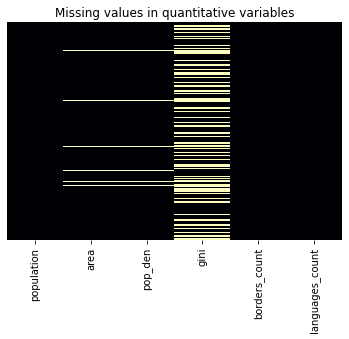

In [1021]:
quan_lst = ['population','area','pop_den','gini','borders_count','languages_count']
sns.heatmap(df[quan_lst].isnull(),cbar=False, cmap='magma', yticklabels=False)
plt.title('Missing values in quantitative variables')
plt.show()

Fill missing area values.

In [1022]:
df.loc[33,'area'] = 34.2
df.loc[78,'area'] = 83534
df.loc[90,'area'] = 1628
df.loc[140,'area'] = 1128
df.loc[143,'area'] = 374
df.loc[171,'area'] = 6020
df.loc[183,'area'] = 2511
df.loc[188,'area'] = 394
df.loc[209,'area'] = 3903
df.loc[216,'area'] = 377

#### EDA

In [1023]:
df.describe()

,population,area,pop_den,gini,borders_count,languages_count
count,2.500000e+02,2.500000e+02,240.000000,153.000000,250.000000,250.000000
mean,2.939655e+07,6.015619e+05,414.336026,40.177124,2.600000,1.472000
std,1.244578e+08,1.914304e+06,1987.978380,9.265119,2.675187,0.901369
min,0.000000e+00,4.400000e-01,0.000000,24.000000,0.000000,1.000000
25%,2.029030e+05,1.110000e+03,30.350060,33.700000,0.000000,1.000000
50%,4.648734e+06,6.492950e+04,81.839835,38.600000,2.000000,1.000000
75%,1.803955e+07,3.727260e+05,202.263989,46.200000,4.000000,2.000000
max,1.377422e+09,1.712444e+07,21636.666667,65.800000,15.000000,10.000000


In [1024]:

fig = make_subplots(rows=1, cols=len(df.describe().columns))

lst = df.describe().columns

for i in range(len(lst)):
    fig.add_trace(go.Box(y=df[lst[i]],
                         name=lst[i],
                         boxpoints='outliers'
                        ), row=1, col=i+1)

fig.update_layout(title_text="Box Plot Quantitative Variables",
                  yaxis_title_text='Value Range')
fig.show()

In [1025]:
fig = make_subplots(rows=1, cols=len(df.describe().columns))

lst = df.describe().columns

for i in range(len(lst)):
    fig.add_trace(go.Histogram(x= df[lst[i]],
                               name=lst[i],
                               histnorm='probability', 
                               ), row=1, col=i+1)

fig.update_layout(
    title_text='Histogram Quantitative Variables', # title of plot
#     xaxis_title_text='Value Range', # xaxis label
    yaxis_title_text='Count Percentage', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
    
fig.show()

Quantitative variables of population and area columns are positive skew. 

Values in gini column is normally distributed.

### Other varibales

#### latlng column

In [1026]:
#Fill [] empty list values in latlng column
latlon=df['latlng']
latlon1=fill_empty_list(latlon)
df['latlng']=latlon1

# Organize sub-datasets and Questions 

In [1027]:
info_lst = ['country','alphaCode', 'flag', 'capital', 'latlng', 'population',  'area',
          'borders', 'region', 'subregion', 'demonym','languages']
# language = ['nativeName','languages_iso639_1', 'languages_iso639_2', 
#             'languages_nativeName','region', 'subregion','latlng','translations.de',
#             'translations.es', 'translations.fr', 'translations.ja',
#             'translations.it', 'translations.br', 'translations.pt',
#             'translations.nl', 'translations.hr', 'translations.fa']
economic = ['country','alphaCode','latlng',  'gini', 'borders','currencies','regionalBlocs']

# demonym: nhóm ng, tộc người, nhóm dân tộc
# gini: độ chênh lệch giàu nghèo

In [1028]:
df.columns

Index(['country', 'alphaCode', 'capital', 'region', 'subregion', 'population',
       'latlng', 'demonym', 'area', 'pop_den', 'gini', 'timezones', 'borders',
       'borders_count', 'nativeName', 'currencies', 'languages',
       'languages_count', 'flag', 'regionalBlocs', 'cioc'],
      dtype='object')

## Country info subset

In [1029]:
c_info = df[info_lst]

Quests:

From regional view
- Map represent geographic region/sub-regions and borders with countries (nhấn mạnh các nước có càng nhiều border chung với các nước khác)
- Map represent geographic region/sub-regions VS currency groups
- Map represent geographic region/sub-regions VS languages groups




In [1030]:
c_info.head()

,country,alphaCode,flag,capital,latlng,population,area,borders,region,subregion,demonym,languages
0,Afghanistan,AFG,https://restcountries.eu/data/afg.svg,Kabul,"[33.0, 65.0]",27657145,652230.0,"[IRN, PAK, TKM, UZB, TJK, CHN]",Asia,Southern Asia,Afghan,"[Pashto, Uzbek, Turkmen]"
1,Åland Islands,ALA,https://restcountries.eu/data/ala.svg,Mariehamn,"[60.116667, 19.9]",28875,1580.0,[],Europe,Northern Europe,Ålandish,[Swedish]
2,Albania,ALB,https://restcountries.eu/data/alb.svg,Tirana,"[41.0, 20.0]",2886026,28748.0,"[MNE, GRC, MKD, KOS]",Europe,Southern Europe,Albanian,[Albanian]
3,Algeria,DZA,https://restcountries.eu/data/dza.svg,Algiers,"[28.0, 3.0]",40400000,2381741.0,"[TUN, LBY, NER, ESH, MRT, MLI, MAR]",Africa,Northern Africa,Algerian,[Arabic]
4,American Samoa,ASM,https://restcountries.eu/data/asm.svg,Pago Pago,"[-14.33333333, -170.0]",57100,199.0,[],Oceania,Polynesia,American Samoan,"[English, Samoan]"


### From population density points of view

Quest: Từ góc nhìn trên mật độ dân số
- Map show mật độ dân số (population/area) cao-thấp (color) vs population(circle area)
- Map show độ phân trải của các nhóm dân tộc (demonym) VS mật độ dân số
- Map show độ phân trải của các nhóm languages vs mật độ dân số

Population density Vs. Population

In [1031]:
c_info.insert(7, 'pop_den', c_info['population']/c_info['area'])
c_info['pop_den'].describe()

count      250.000000
mean       407.082521
std       1948.712944
min          0.000000
25%         27.837028
50%         81.839835
75%        209.051777
max      21636.666667
Name: pop_den, dtype: float64

In [1032]:
c_info['pop_den'].max()

21636.666666666668

In [1033]:
pop_den_gr = [i for i in range(5)]
c_info.insert(8, 'pop_den_gr', 0)
c_info['pop_den_gr'][c_info['pop_den'] < c_info['pop_den'].max()*0.2] = 1
c_info['pop_den_gr'][(c_info['pop_den'] >= c_info['pop_den'].max()*0.2) & (c_info['pop_den'] < c_info['pop_den'].max()*0.4)] = 2
c_info['pop_den_gr'][(c_info['pop_den'] >= c_info['pop_den'].max()*0.4) & (c_info['pop_den'] < c_info['pop_den'].max()*0.6)] = 3
c_info['pop_den_gr'][(c_info['pop_den'] >= c_info['pop_den'].max()*0.6) & (c_info['pop_den'] < c_info['pop_den'].max()*0.8)] = 4
c_info['pop_den_gr'][c_info['pop_den'] >= c_info['pop_den'].max()*0.8] = 5
c_info['pop_den_gr'].value_counts()

/home/nhoxkhjjunammun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/nhoxkhjjunammun/.local/lib/python3.6/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/nhoxkhjjunammun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/nhoxkhjjunammun/.local/lib/python3.6/site-pac

1    245
2      3
5      2
Name: pop_den_gr, dtype: int64

In [1034]:
c_info[c_info['pop_den_gr'] == 0]

# fill in area for these country

,country,alphaCode,flag,capital,latlng,population,area,pop_den,pop_den_gr,borders,region,subregion,demonym,languages


In [1035]:
c_info['region'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Americas', 'Polar'],
      dtype=object)

In [1036]:
# c_info = c_info[c_info['region'] == 'Oceania']

fig = go.Figure()

fig.add_trace(go.Choropleth(
    locations = c_info['alphaCode'],
    z = c_info['pop_den'],
    text = c_info['country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    zmin=0, 
    zmax=c_info['pop_den'].max(),
    marker_line_color='darkgray',
    marker_line_width=0.5,
#     colorbar_tickprefix = '/km2',
    colorbar_ticksuffix = '/km2',
    colorbar_title = 'World Population<br>Density',
))




fig.update_layout(
    title_text='World Population Density',
    geo=dict(
#         scope='europe', #limit area to be showed on map
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
#     annotations = [dict(
#         x=0.55,
# #         y=0.1,
#         xref='paper',
#         yref='paper',
# #         text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
# #             CIA World Factbook</a>',
#         showarrow = False
#     )]
)

fig.show()

#  The 'scope' property is an enumeration that may be specified as:
#       - One of the following enumeration values:
#             ['world', 'usa', 'europe', 'asia', 'africa', 'north
#             america', 'south america']

## Country economic subset

In [1037]:
df[economic].head(3)

,country,alphaCode,latlng,gini,borders,currencies,regionalBlocs
0,Afghanistan,AFG,"[33.0, 65.0]",27.8,"[IRN, PAK, TKM, UZB, TJK, CHN]",AFN,South Asian Association for Regional Cooperation
1,Åland Islands,ALA,"[60.116667, 19.9]",NaN,[],EUR,European Union
2,Albania,ALB,"[41.0, 20.0]",34.5,"[MNE, GRC, MKD, KOS]",ALL,Central European Free Trade Agreement


Quest:

Xét trên quan hệ các hiệp định đã ký
- Hiệp định Vs Region/sub-regions
- Map thể hiện các nước tham gia vào các hiệp định chung (regionalBlocs) (press các nước tham gia vào càng nhiều hiệp định chung) + Map so sánh đối chiếu giữa các nước tham gia càng nhiều hiệp định Vs số lượng border chung với các nc khác. Rút kết luận tương quan.
- Map show gini (phân cấp giàu nghèo) vs hiệp định tham gia (regionalBlocs)
- Map shoư quan hệ giữa currency vs các hiệp định (regionalBlocs)


Xét trên quan hệ gini
- gini (phân cấp giàu nghèo) VS nhóm region/sub-region
- Map show gini (phân cấp giàu nghèo) VS mật độ dân số (population/area) cao-thấp 
- gini (phân cấp giàu nghèo) VS nhóm ngôn ngữ
- gini (phân cấp giàu nghèo) VS nhóm currency
